# Simple Linear Regression(Priyanshu)

## Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing DataSet

In [26]:
dataset = pd.read_csv('Salary_data.csv')
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


# Defining Data Set 

In [3]:
X = dataset.iloc[:, :-1].values # X is independent variable & also called as matrix of features
y = dataset.iloc[:, 1].values # dependent variable & y is vector 

## Checking for Empty Row in any column 

In [4]:
# isnull() : will generates a copy of dataset and return true if dataset is missing & false if dataset is present
# sum() : this is then applied to boolean values which calculates sum of true for every column 
dataset.isnull().sum() # checking for missing data

YearsExperience    0
Salary             0
dtype: int64

# Splitting training & Test Data Set

In [5]:
#Import 'train_test_split' class from 'model_selection' module present in 'sklearn' library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# random state = seed value --> only provide the starting point to generate the data from that seed value
# random state  signifies that every time we wnat to split the data set the same set of data is chosen as 
# training and split otherwise everytime it chose different data for train & test

In [6]:
print(X_train.shape )# to get shape(row, column)
print(type(X_train)) # to get type

(20, 1)
<class 'numpy.ndarray'>


In [7]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [8]:
print(X_test.shape)

(10, 1)


In [9]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [10]:
y_test.shape # y_test is 1D array so we are getting anything after ','.

(10,)

# Fitting Simple Linear Regression to the Training Set

In [11]:
# Importing linear Regression class from 'linear_model' module present in sklearn library. 
from sklearn.linear_model import LinearRegression
 
regressor = LinearRegression() # object of Linear Regression class which is used to trian linear regression model
# fit method is use to train the model on given dataset
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting Test Set Results

In [20]:
y_predict = regressor.predict(X_test)# predict --> method which predict the result of X_test set
np.set_printoptions(2)

In [21]:
y_predict # y_predict to get int --> y_predict.astype(int)

array([ 40835.11, 123079.4 ,  65134.56,  63265.37, 115602.65, 108125.89,
       116537.24,  64199.96,  76349.69, 100649.14])

In [22]:
y_predict = y_predict.reshape(len(y_predict), 1)
y_test = y_test.reshape(len(y_test), 1)
np.concatenate((y_predict, y_test), axis = 1)

array([[ 40835.11,  37731.  ],
       [123079.4 , 122391.  ],
       [ 65134.56,  57081.  ],
       [ 63265.37,  63218.  ],
       [115602.65, 116969.  ],
       [108125.89, 109431.  ],
       [116537.24, 112635.  ],
       [ 64199.96,  55794.  ],
       [ 76349.69,  83088.  ],
       [100649.14, 101302.  ]])

# Visualising The Training Set Result

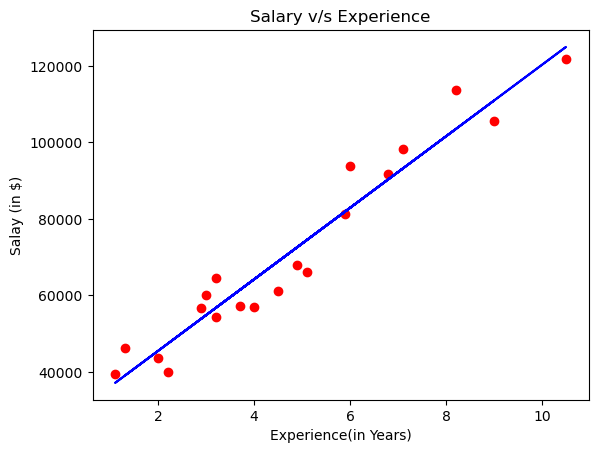

In [15]:
plt.scatter(X_train, y_train, color = 'red')

# X coordinates = X_train & y coordinates = the predictaed value of X_train
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary v/s Experience')
plt.xlabel('Experience(in Years)')
plt.ylabel('Salay (in $)')
plt.show()

# Visualising The Test Set Result

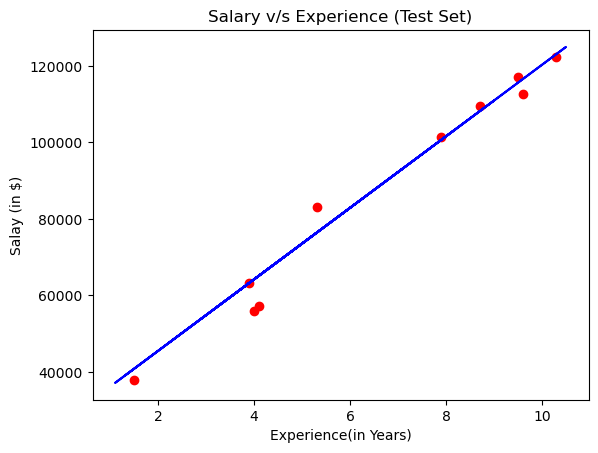

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary v/s Experience (Test Set)')
plt.xlabel('Experience(in Years)')
plt.ylabel('Salay (in $)')
plt.show()

# Visualising training set & test set in a single graph


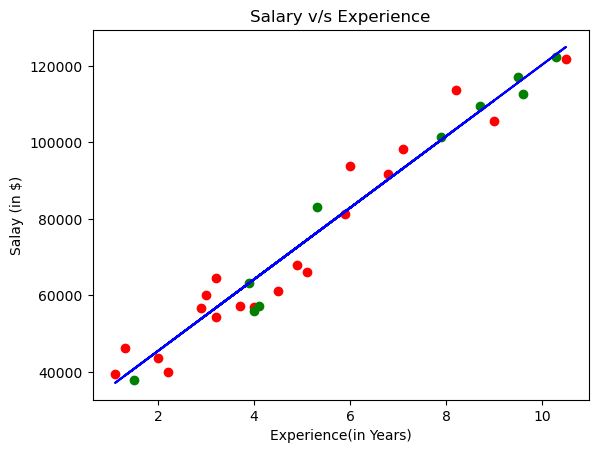

In [17]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
# X coordinates = X_train & y coordinates = the predictaed value of X_train
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary v/s Experience')
plt.xlabel('Experience(in Years)')
plt.ylabel('Salay (in $)')
plt.show()

## Predicting R2 value

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test, y_predict)

0.9749154407708353